In [1]:
%matplotlib inline
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import drizzlepac
import grizli
import glob
from grizli import utils
import importlib
from grizli.prep import process_direct_grism_visit
from hsaquery import query, overlaps
from grizli.pipeline import auto_script
from grizli.multifit import GroupFLT, MultiBeam, get_redshift_fit_defaults
import os
from grizli.pipeline import photoz
from astropy.table import Table
from matplotlib.colors import LogNorm
from IPython.display import Image
from numpy import *
import photutils
from astropy.cosmology import Planck15 as cosmo
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


In [2]:
# Results of the fit are saved in *full.fits
field = 'GS1'
id_fit = 43403
PATH_TO_PREP = '/Users/rsimons/Desktop/clear/for_hackday/Prep'
fits_file = PATH_TO_PREP + '/{0}_{1:05d}.full.fits'.format(field, id_fit)
fit_hdu = fits.open(fits_file)
tht = 320
ab = 3
pix_scale = abs(fit_hdu['DSCI'].header['CD1_1'] * 60. * 60.)



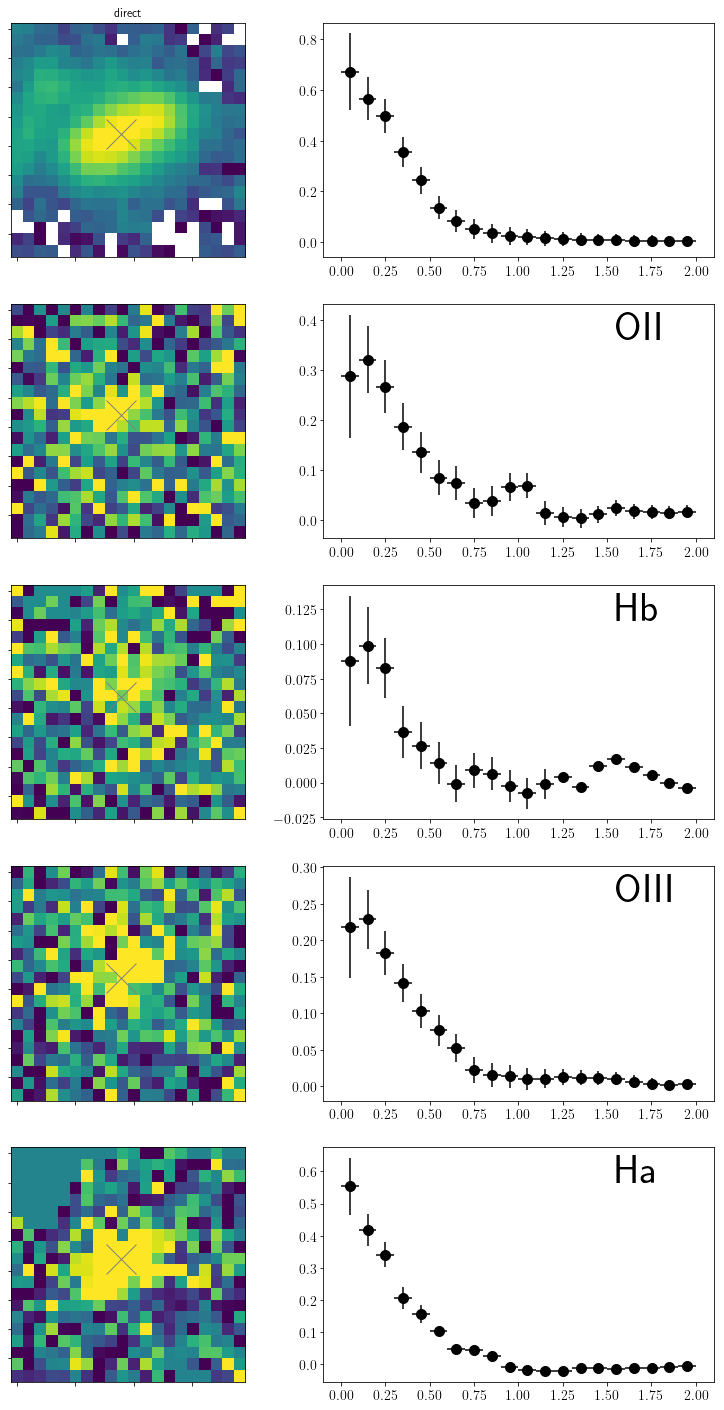

In [3]:
fig, axes = plt.subplots(5,2, figsize = (14, 25))

for ax in axes[:,0]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

lines = ['OII', 'Hb', 'OIII', 'Ha']

mnx = 30
mxx = 50

direct_im = fit_hdu['DSCI'].data[mnx:mxx, mnx:mxx]

x1, y1 = photutils.centroid_2dg(direct_im)
axes[0,0].plot(x1, y1, marker = 'x', color = 'Grey', markersize = 30)



srt_rvl = np.sort(direct_im.ravel())
vmn = srt_rvl[int(0.1*len(srt_rvl))]
vmx = srt_rvl[int(0.98*len(srt_rvl))]



derr = 1./np.sqrt(fit_hdu['DWHT'].data)


axes[0,0].imshow(fit_hdu['DSCI'].data[mnx:mxx, mnx:mxx], norm = LogNorm(), vmin = vmn, vmax = vmx)
axes[0,0].set_title('direct')

min_a = 0.01
max_a = 20

da = 1.

a_arr = np.arange(min_a, max_a, da)

for a_in in a_arr:
    a_out = a_in + da
    ea = photutils.EllipticalAnnulus(positions = (x1, y1), a_in = a_in, a_out = a_out, b_out = a_out/ab, theta = tht)
    ap_sums = ea.do_photometry(direct_im, derr)
    
    
    axes[0, 1].errorbar((a_in+da/2.) * pix_scale, ap_sums[0]/ea.area(), xerr = da/2. * pix_scale, yerr = ap_sums[1]/ea.area(), color = 'black', marker = 'o', ms = 10)
    #for ax in axes[:, 0]:
    #ea.plot(ax = ax)

#ax2.set_yscale('log')
       
        
aps = np.zeros((3, len(a_arr), len(lines)))
clrs = ['blue', 'purple', 'red', 'green']
for l, line in enumerate(lines):
    line_im = fit_hdu['LINE', line].data[mnx:mxx, mnx:mxx]
    line_err = 1/np.sqrt(fit_hdu['LINEWHT', line].data[mnx:mxx, mnx:mxx])

    srt_rvl = np.sort(line_im.ravel())
    vmn = srt_rvl[int(0.1*len(srt_rvl))]
    vmx = srt_rvl[int(0.9*len(srt_rvl))]
    
    axes[l+1, 0].plot(x1, y1, marker = 'x', color = 'Grey', markersize = 30)

    axes[l+1, 0].imshow(line_im, vmin = vmn, vmax = vmx)

    for a, a_in in enumerate(a_arr):
        a_out = a_in + da
        ea = photutils.EllipticalAnnulus(positions = (x1, y1), a_in = a_in, a_out = a_out, b_out = a_out/ab, theta = 320)
        ap_sums = ea.do_photometry(line_im, line_err)
        
        aps[0, a, l] = (a_in + da/2.) * pix_scale
        aps[1, a, l] = ap_sums[0]/ea.area()
        aps[2, a, l] = ap_sums[1]/ea.area()
        
        
        

        axes[l+1, 1].errorbar((a_in+da/2.) * pix_scale, ap_sums[0]/ea.area(), xerr = da/2. * pix_scale, yerr = ap_sums[1]/ea.area(), color = 'black', marker = 'o', ms = 10)
            
    axes[l+1, 1].annotate(line, (0.75, 0.85), xycoords = 'axes fraction', color = 'black', fontweight = 'bold', fontsize = 40)
            
        
fig.subplots_adjust(wspace = 0.0, hspace = 0.2)


0.24 5.58
8.04 5.58 0.22 0.29 0.07 0.12
0.12 0.14
8.10 0.14 0.23 0.32 0.04 0.07
0.10 0.12
8.12 0.12 0.18 0.27 0.03 0.05
0.14 0.19
8.06 0.19 0.14 0.19 0.03 0.05
0.17 1.75
8.04 1.75 0.10 0.13 0.02 0.04
0.27 11.36
7.76 11.36 0.08 0.08 0.02 0.04
0.24 14.44
8.10 14.44 0.05 0.07 0.02 0.03
0.46 36.46
8.87 36.46 0.02 0.03 0.02 0.03
0.33 59.33
7.53 59.33 0.02 0.04 0.02 0.03
0.15 7.18
8.33 7.18 0.01 0.07 0.02 0.03
0.13 1.66
8.43 1.66 0.01 0.07 0.01 0.03
0.92 14.10
8.62 14.10 0.01 0.01 0.01 0.02
4.37 126.09
9.46 126.09 0.01 0.01 0.01 0.02
13.64 33.64
8.28 33.64 0.01 0.00 0.01 0.02
0.95 21.11
8.43 21.11 0.01 0.01 0.01 0.02
0.28 17.73
8.25 17.73 0.01 0.02 0.01 0.02
0.35 7.90
8.40 7.90 0.01 0.02 0.01 0.02
0.31 47.23
7.96 47.23 0.00 0.02 0.01 0.01
0.30 9.90
8.60 9.90 0.00 0.01 0.01 0.01
0.24 52.26
8.83 52.26 0.00 0.02 0.01 0.01


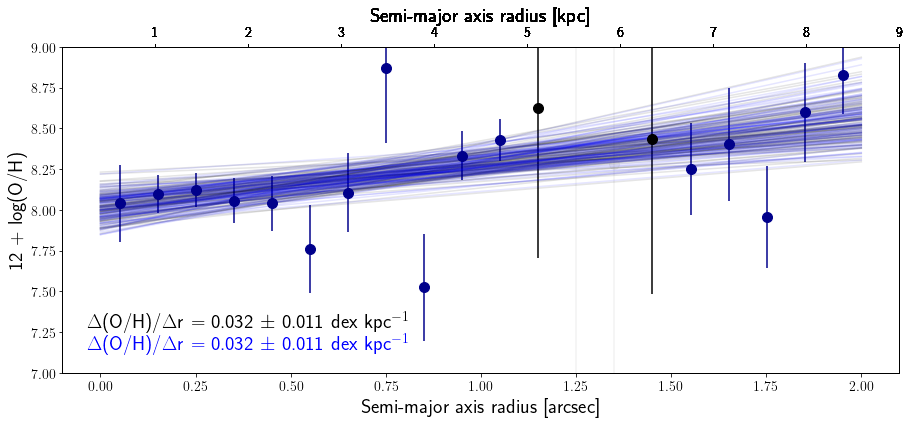

In [28]:
np.random.seed(9)
def OH(O3, O2, eO3, eO2):
    
    O3_arr = np.random.normal(O3, eO3, 10000)
    O2_arr = np.random.normal(O2, eO2, 10000)
    
    OH_z_arr = 8.54 - 0.59 * O3_arr/O2_arr
    e_an = 0.59*((O3/O2) * sqrt((eO3/O3)**2. + (eO2/O2)**2.))
    
    print ('%.2f %.2f'%(e_an, np.std(OH_z_arr)))
    
    
    print ('%.2f %.2f %.2f %.2f %.2f %.2f' %(np.mean(OH_z_arr), np.std(OH_z_arr), O3, O2, eO3, eO2,))
    return np.mean(OH_z_arr), e_an#np.std(OH_z_arr)
    
fig3, ax3 = plt.subplots(1,1, figsize = (15, 6))
z = fit_hdu[1].header['Z50']
    


to_fit = []
for a in np.arange(len(a_arr)):
    OH_z, eOH_z = OH(O3 = aps[1, a, 2], O2 = aps[1, a, 0], eO3 = aps[2, a, 2], eO2 = aps[2, a, 0])


    if eOH_z/OH_z > 1/3.:
        alp = 0.1
        clr = 'grey'

    elif eOH_z/OH_z < 0.1:
        alp = 1.0
        clr = 'darkblue'
    else:
        alp = 1.0
        clr = 'black'            

    to_fit.append([aps[0,a,2], OH_z, eOH_z])

    ax3.errorbar(aps[0,a,2], OH_z, yerr = eOH_z,color = clr, fmt = 'o', alpha = alp, markersize = 10, zorder = 2)
    ax3.set_ylim(7., 9)
    ax3.set_ylabel(r'12 + log(O/H)', fontsize = 20)
    ax3.set_xlabel(r'Semi-major axis radius [arcsec]', fontsize = 20)
    ax3_t = ax3.twiny()


    kpc_ticks = np.arange(1, 10)

    arc_ticks = np.array([cosmo.arcsec_per_kpc_proper(z).value * k for k in kpc_ticks])






    ax3_t.set_xticks(arc_ticks)
    ax3_t.set_xticklabels(np.array(['%i'%k for k in kpc_ticks]))
    ax3_t.set_xlabel('Semi-major axis radius [kpc]', fontsize = 20)

to_fit = np.array(to_fit)


clrs = ['black', 'blue']
for b, ar in enumerate(np.array([5., 3.])):  
    g = where(to_fit[:,1]/to_fit[:,2] > ar)[0]
    p, V = np.polyfit(to_fit[g,0], to_fit[g,1], deg = 1., w = 1./to_fit[g,2], cov = True)

    x = np.linspace(0, 2, 1000)

    draws = np.random.multivariate_normal(p, V, size = 100)
    ax3.annotate(r'$\Delta$(O/H)/$\Delta$r = %.3f $\pm$ %.3f dex kpc$^{-1}$'%(p[0]*cosmo.arcsec_per_kpc_proper(z).value, np.sqrt(V[0,0])*cosmo.arcsec_per_kpc_proper(z).value), xy = (0.03, 0.14 - b*0.07),color = clrs[b], fontsize = 20, xycoords = 'axes fraction')


    for d in draws:
        ax3.plot(x, x*d[0] + d[1], color = clrs[b], alpha = 0.1)



In [24]:
to_fit

array([[5.10000000e-02, 8.03907264e+00, 5.58218389e+00],
       [1.51000000e-01, 8.09775630e+00, 1.39867303e-01],
       [2.51000000e-01, 8.11899130e+00, 1.22175262e-01],
       [3.51000000e-01, 8.05656211e+00, 1.90399731e-01],
       [4.51000000e-01, 8.03900675e+00, 1.75451778e+00],
       [5.51000000e-01, 7.76077844e+00, 1.13647206e+01],
       [6.51000000e-01, 8.10471805e+00, 1.44417288e+01],
       [7.51000000e-01, 8.86893825e+00, 3.64576266e+01],
       [8.51000000e-01, 7.52550810e+00, 5.93297141e+01],
       [9.51000000e-01, 8.33304575e+00, 7.18108824e+00],
       [1.05100000e+00, 8.42762916e+00, 1.66076611e+00],
       [1.15100000e+00, 8.62367972e+00, 1.40978846e+01],
       [1.25100000e+00, 9.46434252e+00, 1.26089149e+02],
       [1.35100000e+00, 8.28211030e+00, 3.36362663e+01],
       [1.45100000e+00, 8.43270820e+00, 2.11147330e+01],
       [1.55100000e+00, 8.24978212e+00, 1.77258099e+01],
       [1.65100000e+00, 8.40061855e+00, 7.90211780e+00],
       [1.75100000e+00, 7.95753

In [7]:
# Results of the fit are saved in *full.fits
field = 'GN2'
id_fit = 10512
PATH_TO_PREP = '/Volumes/wd/clear/GN2/j123652+621424/Prep'
fits_file = PATH_TO_PREP + '/{0}_{1:05d}.full.fits'.format(field, id_fit)
fit_hdu = fits.open(fits_file)
tht = 80
ab = 1.3



pix_scale = abs(fit_hdu['DSCI'].header['CD1_1'] * 60. * 60.)



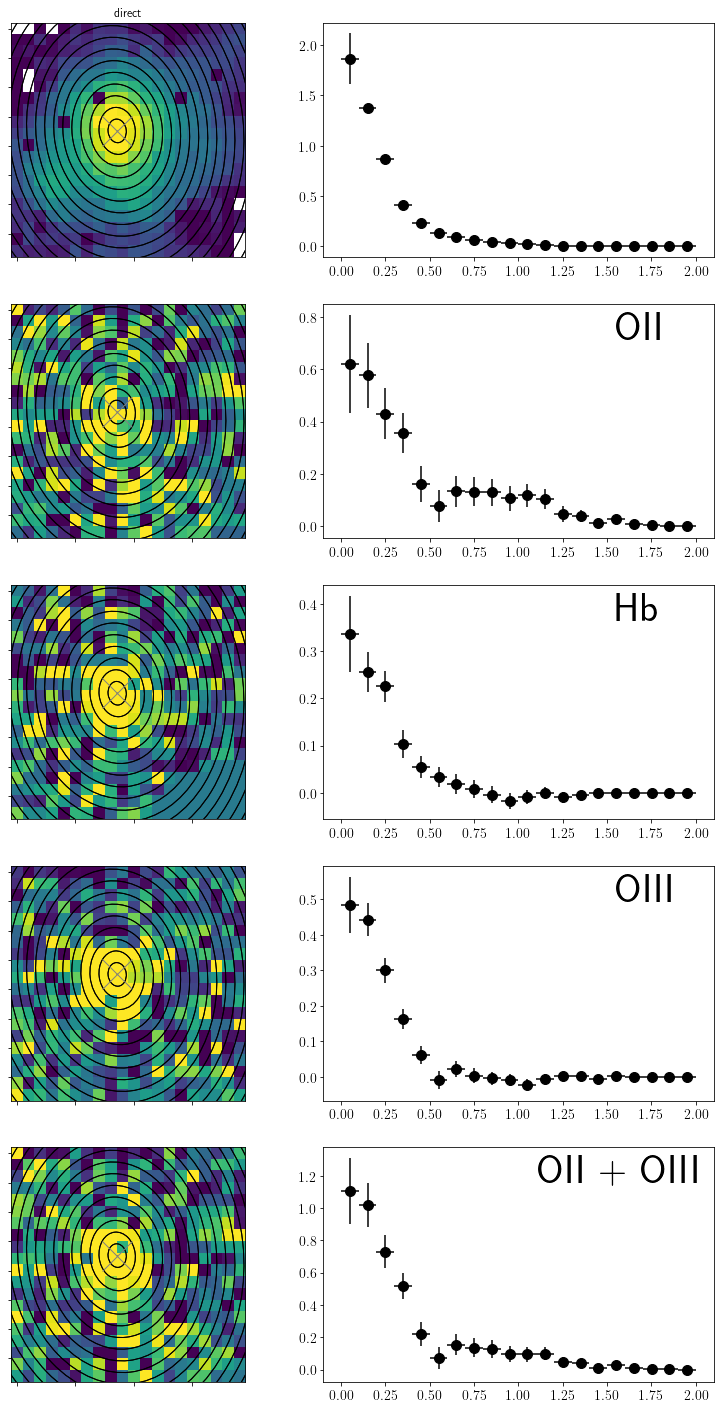

In [8]:
fig, axes = plt.subplots(5,2, figsize = (14, 25))

for ax in axes[:,0]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

lines = ['OII', 'Hb', 'OIII', 'OII + OIII']

mnx = 30
mxx = 50

direct_im = fit_hdu['DSCI'].data[mnx:mxx, mnx:mxx]

x1, y1 = photutils.centroid_2dg(direct_im)
axes[0,0].plot(x1, y1, marker = 'x', color = 'Grey', markersize = 30)



srt_rvl = np.sort(direct_im.ravel())
vmn = srt_rvl[int(0.1*len(srt_rvl))]
vmx = srt_rvl[int(0.98*len(srt_rvl))]



derr = 1./np.sqrt(fit_hdu['DWHT'].data)


axes[0,0].imshow(fit_hdu['DSCI'].data[mnx:mxx, mnx:mxx], norm = LogNorm(), vmin = vmn, vmax = vmx)
axes[0,0].set_title('direct')

min_a = 0.01
max_a = 20

da = 1.

a_arr = np.arange(min_a, max_a, da)

for a_in in a_arr:
    a_out = a_in + da
    ea = photutils.EllipticalAnnulus(positions = (x1, y1), a_in = a_in, a_out = a_out, b_out = a_out/ab, theta = tht)
    ap_sums = ea.do_photometry(direct_im, derr)
    
    
    axes[0, 1].errorbar((a_in+da/2.) * pix_scale, ap_sums[0]/ea.area(), xerr = da/2. * pix_scale, yerr = ap_sums[1]/ea.area(), color = 'black', marker = 'o', ms = 10)
    for ax in axes[:, 0]:
        ea.plot(ax = ax)

#ax2.set_yscale('log')
       
        
aps = np.zeros((3, len(a_arr), len(lines)))
clrs = ['blue', 'purple', 'red', 'green']
for l, line in enumerate(lines):
    if line == 'OII + OIII':
        line_im = fit_hdu['LINE', 'OII'].data[mnx:mxx, mnx:mxx] + fit_hdu['LINE', 'OIII'].data[mnx:mxx, mnx:mxx]
        line_err = np.sqrt((1/np.sqrt(fit_hdu['LINEWHT', 'OII'].data[mnx:mxx, mnx:mxx]))**2. + (1/np.sqrt(fit_hdu['LINEWHT', 'OIII'].data[mnx:mxx, mnx:mxx]))**2.)
        #line_err = np.zeros(line_im.shape) - 0.7
    else:
        line_im = fit_hdu['LINE', line].data[mnx:mxx, mnx:mxx]
        line_err = 1/np.sqrt(fit_hdu['LINEWHT', line].data[mnx:mxx, mnx:mxx])
    
    line_err[~np.isfinite(line_err)] = nanmedian(line_err)
        
        
        
    srt_rvl = np.sort(line_im.ravel())
    vmn = srt_rvl[int(0.1*len(srt_rvl))]
    vmx = srt_rvl[int(0.9*len(srt_rvl))]
    
    axes[l+1, 0].plot(x1, y1, marker = 'x', color = 'Grey', markersize = 30)

    axes[l+1, 0].imshow(line_im, vmin = vmn, vmax = vmx)

    for a, a_in in enumerate(a_arr):
        a_out = a_in + da
        ea = photutils.EllipticalAnnulus(positions = (x1, y1), a_in = a_in, a_out = a_out, b_out = a_out/ab, theta = 320)
        ap_sums = ea.do_photometry(line_im, line_err)
        
        aps[0, a, l] = (a_in + da/2.) * pix_scale
        aps[1, a, l] = ap_sums[0]/ea.area()
        aps[2, a, l] = ap_sums[1]/ea.area()

        

        axes[l+1, 1].errorbar((a_in+da/2.) * pix_scale, ap_sums[0]/ea.area(), xerr = da/2. * pix_scale, yerr = ap_sums[1]/ea.area(), color = 'black', marker = 'o', ms = 10)
    
    if line == 'OII + OIII':xtxt = 0.55
    else: xtxt = 0.75
    
    axes[l+1, 1].annotate(line, (xtxt, 0.85), xycoords = 'axes fraction', color = 'black', fontweight = 'bold', fontsize = 40)
            
        
fig.subplots_adjust(wspace = 0.0, hspace = 0.2)


10.0
3.0


(0.0, 2.0)

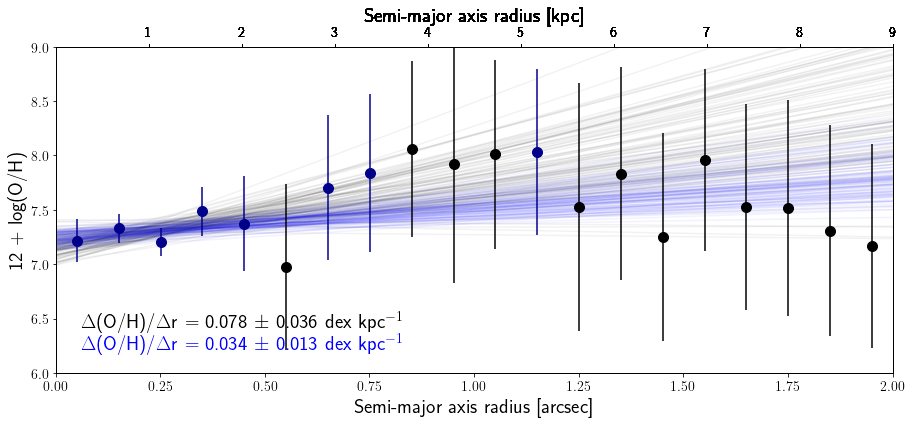

In [10]:
np.random.seed(9)
def OH(O23, Hb, eO23, eHb): 
    if np.isnan(eHb): return nan, nan
    if np.isnan(eO23):return nan, nan
    O23_arr = np.random.normal(O23, eO23, 10000)
    Hb_arr = np.random.normal(Hb, eHb, 10000)
    
    OH_z_arr = 6.486 + 1.401 * np.log10(O23_arr/Hb_arr)
    
    return np.nanmean(OH_z_arr), np.nanstd(OH_z_arr)
    
fig3, ax3 = plt.subplots(1,1, figsize = (15, 6))
z = fit_hdu[1].header['Z50']

clrs = ['grey', 'blue']

to_fit = []
for a in np.arange(len(a_arr)):
    OH_z, eOH_z = OH(O23 = aps[1, a, 3], Hb = aps[1, a, 1], eO23 = aps[2, a, 3], eHb = aps[2, a, 1])


    if eOH_z/OH_z > 1/3.:
        alp = 0.1
        clr = 'grey'

    elif eOH_z/OH_z < 0.1:
        alp = 1.0
        clr = 'darkblue'
    else:
        alp = 1.0
        clr = 'black'            


    to_fit.append([aps[0,a,2], OH_z, eOH_z])

    ax3.errorbar(aps[0,a,2], OH_z, yerr = eOH_z,color = clr, fmt = 'o', alpha = alp, markersize = 10, zorder = 2)
    ax3.set_ylabel(r'12 + log(O/H)', fontsize = 20)
    ax3.set_xlabel(r'Semi-major axis radius [arcsec]', fontsize = 20)
    ax3_t = ax3.twiny()


    kpc_ticks = np.arange(1, 10)

    arc_ticks = np.array([cosmo.arcsec_per_kpc_proper(z).value * k for k in kpc_ticks])

    ax3_t.set_xticks(arc_ticks)
    ax3_t.set_xticklabels(np.array(['%i'%k for k in kpc_ticks]))
    ax3_t.set_xlabel('Semi-major axis radius [kpc]', fontsize = 20)

to_fit = np.array(to_fit)
to_fit = to_fit[~isnan(to_fit[:,2])]


clrs = ['black', 'blue']
for b, ar in enumerate(np.array([10., 3.])):  
    g = where(to_fit[:,1]/to_fit[:,2] > ar)[0]
    print (ar)
    p, V = np.polyfit(to_fit[g,0], to_fit[g,1], deg = 1., w = 1./to_fit[g,2], cov = True)

    x = np.linspace(0, 2, 1000)

    draws = np.random.multivariate_normal(p, V, size = 100)

    ax3.annotate(r'$\Delta$(O/H)/$\Delta$r = %.3f $\pm$ %.3f dex kpc$^{-1}$'%(p[0]*cosmo.arcsec_per_kpc_proper(z).value, np.sqrt(V[0,0])*cosmo.arcsec_per_kpc_proper(z).value), xy = (0.03, 0.14 - b*0.07),color = clrs[b], fontsize = 20, xycoords = 'axes fraction')
    for d in draws:
        ax3.plot(x, x*d[0] + d[1], color = clrs[b], alpha = 0.05, zorder = 1)
ax3.set_ylim(6., 9)
ax3.set_xlim(0., 2.)



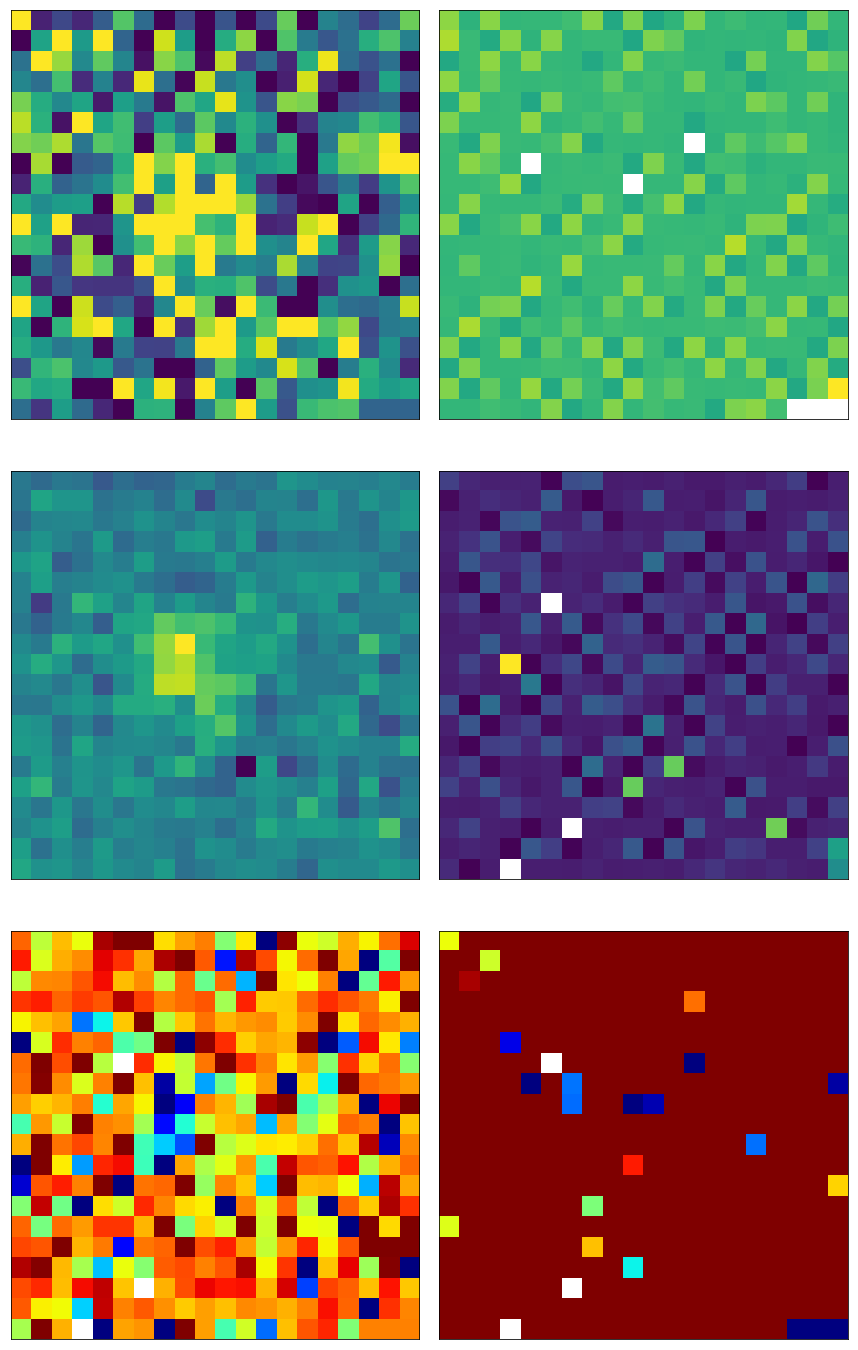

In [10]:
def OH(O3, O2, eO3, eO2):    
    O3_arr = np.random.normal(O3, eO3, 10000)
    O2_arr = np.random.normal(O2, eO2, 10000)
    OH_z_arr = 8.54 - 0.59 * O3_arr/O2_arr
    
    return np.mean(OH_z_arr), np.std(OH_z_arr)
    


fig, axes = plt.subplots(3,2, figsize = (15, 25))
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

OII_im = fit_hdu['LINE', 'OII'].data[mnx:mxx, mnx:mxx]
OII_err = 1/np.sqrt(fit_hdu['LINEWHT', 'OII'].data[mnx:mxx, mnx:mxx])

OIII_im = fit_hdu['LINE', 'OIII'].data[mnx:mxx, mnx:mxx]
OIII_err = 1/np.sqrt(fit_hdu['LINEWHT', 'OIII'].data[mnx:mxx, mnx:mxx])



srt_rvl = np.sort(OII_im.ravel())
vmn = srt_rvl[int(0.1*len(srt_rvl))]
vmx = srt_rvl[int(0.9*len(srt_rvl))]

axes[0,0].imshow(OII_im, vmin = vmn, vmax = vmx)
axes[0,1].imshow(OII_err, vmin = vmn, vmax = vmx)

srt_rvl = np.sort(OIII_im.ravel())
vmn = srt_rvl[int(0.1*len(srt_rvl))]
vmx = srt_rvl[int(0.9*len(srt_rvl))]

axes[1,0].imshow(OIII_im)
axes[1,1].imshow(OIII_err)


z_map = np.zeros((2,line_im.shape[0], line_im.shape[1]))

for i in np.arange(line_im.shape[0]):
    for j in np.arange(line_im.shape[1]):
        z_map[0,i,j], z_map[1,i,j] = OH(O3 = OIII_im[i,j], O2 = OII_im[i,j], eO3 = OIII_err[i,j], eO2 = OII_err[i,j])
        

axes[2,0].imshow(z_map[0], cmap = 'jet', vmin = 7, vmax = 9)
axes[2,1].imshow(z_map[1], cmap = 'jet', vmin = 0, vmax = 2)

fig.subplots_adjust(wspace = 0.05, hspace = 0.05)
